Classical machine learning algorithms typically use a set of hand-engineered features to represent the input data, and then learn a mapping between those features and the output variable of interest. These algorithms are generally based on statistical models such as linear regression, decision trees, or support vector machines.

In contrast, neural networks learn to automatically extract relevant features from raw input data by iteratively adjusting a large number of interconnected parameters, known as weights, based on the data. This allows neural networks to model complex nonlinear relationships between inputs and outputs, and to learn representations that are optimized for a specific task.
Examples of neural network models include Convolutional Neural Networks (CNNs) for image recognition and Recurrent Neural Networks (RNNs) for natural language processing.


In [1]:
# Neural Network
# Regression example
# House Price Prediction
# Tensor Flow v2 (Keras) built into Google Colab
# Traditional ML assumes linearity; NN can handle non-linearity due to activation function
# https://colab.research.google.com/drive/1T5baywIjwDsXumfIszD4nEe5fOhfiX9Y?usp=sharing#scrollTo=ok7kTHfuMjMM
# https://github.com/fenago/tf/blob/main/deep-learning/Lab_1.md

In [2]:
# Everything that we have done in classical ML can be done here but needs TPU and more complex

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/data.csv")
df.sample(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2792,2014-06-18 00:00:00,424000.0,3.0,2.00,1670,7700,1.0,0,0,3,1170,500,1972,2002,10526 NE 139th St,Kirkland,WA 98034,USA
4026,2014-07-07 00:00:00,229500.0,3.0,1.00,1230,6000,1.0,0,0,4,1230,0,1967,0,1605 21st St NE,Auburn,WA 98002,USA
2855,2014-06-19 00:00:00,520000.0,3.0,1.75,1940,219527,1.0,0,0,3,1940,0,1991,0,24020 SE 202nd St,Maple Valley,WA 98038,USA


In [4]:
to_drop = ['date', 'street','statezip','country']
df = df.drop(to_drop, axis = 1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [5]:
# yr_renovated has zeroes which is DQ issue


In [6]:
# Feature Extraction
# How old is the house?
df['house_age'] = [2023 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2023 - yr_renovated) <= 10 
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2023 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns (that are correlated ie.. )
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,68,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,102,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,57,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,60,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,47,1,0,0


In [7]:
# listing across multiple cities
# more rural where listings are few make them as rare

In [8]:
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [9]:
remap_location(data=df,location='Fall City')

'Rare'

In [10]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
4135,2458000.0,4.0,5.25,6500,14986,2.0,0,0,3,5180,1320,Rare,22,0,0,0
3938,295950.0,2.0,1.00,1190,6200,1.0,0,0,3,1190,0,Shoreline,75,1,0,1
3987,527000.0,6.0,3.50,3000,8401,1.0,0,0,3,1500,1500,Seattle,44,1,1,0
1955,499500.0,3.0,2.50,2520,53143,1.5,0,0,3,2520,0,Rare,35,1,0,1
3528,140000.0,3.0,1.00,1060,7473,1.0,0,0,3,1060,0,Des Moines,64,1,0,0
38,403000.0,3.0,2.00,1960,13100,1.0,0,2,5,1650,310,Rare,66,0,0,0
861,320000.0,3.0,2.50,2680,7757,2.0,0,0,3,2680,0,Federal Way,33,1,0,1
3967,499000.0,3.0,2.50,1540,1326,3.0,0,0,3,1390,150,Seattle,28,0,0,0
4173,507000.0,3.0,1.75,2140,40098,1.0,0,0,5,1490,650,Renton,73,0,0,0
83,410000.0,3.0,2.25,1800,36704,1.0,0,0,4,1360,440,Issaquah,45,1,0,1


In [11]:
# pricing is not normally is distributed
# outlier removal : 3 s.d. test for outlier removals Although NN can handle non-normal we are still removing outlier for better accuracy

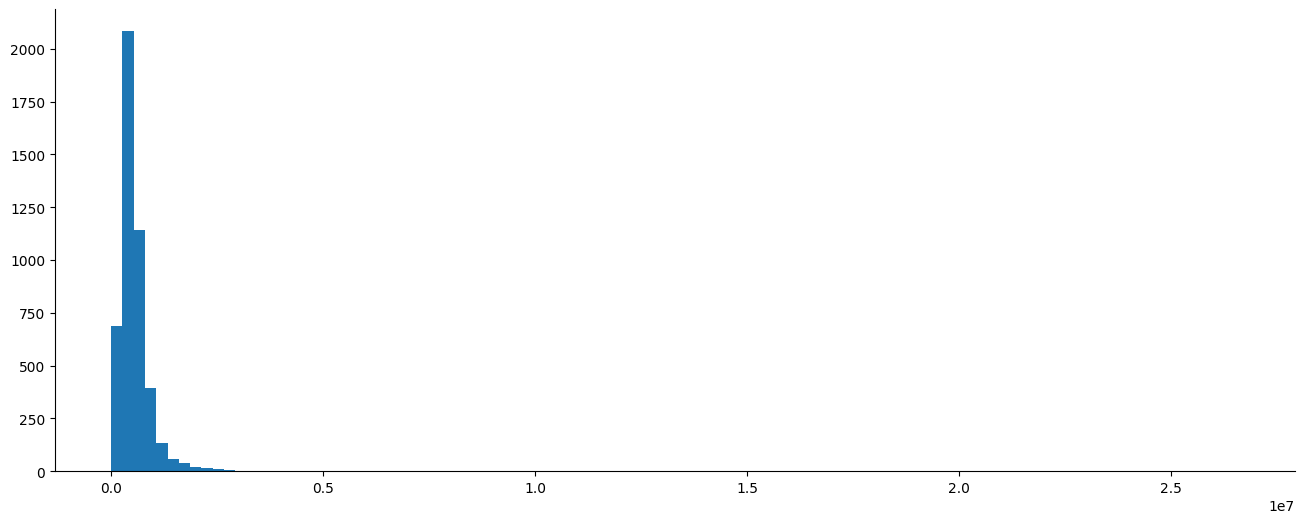

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

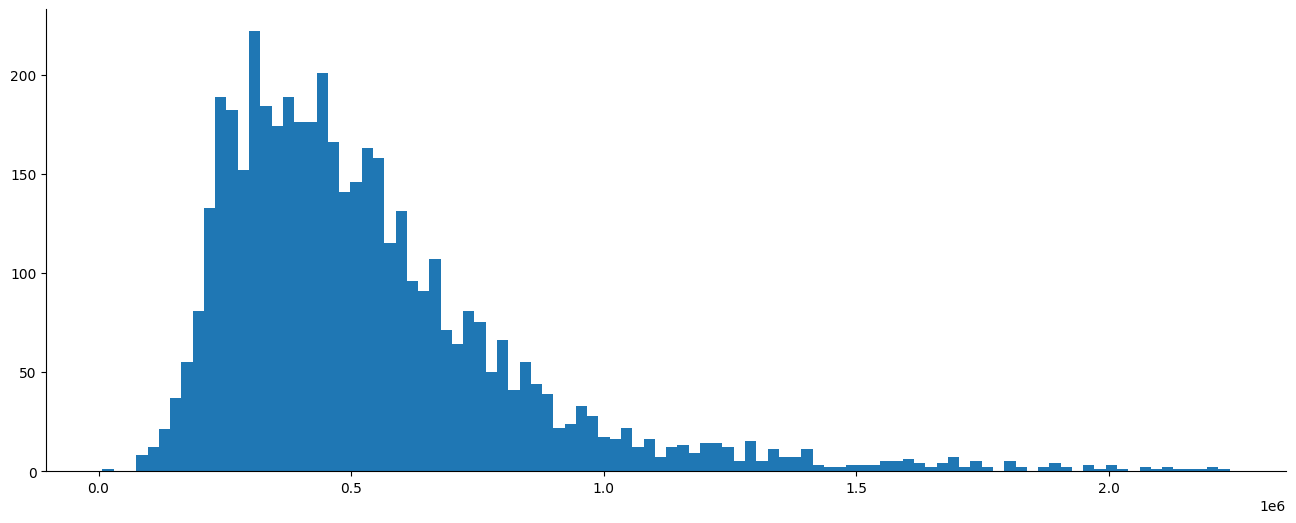

In [13]:
from scipy import stats


# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['sqft_living', 'sqft_lot','sqft_above', 
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['bedrooms', 'bathrooms', 'floors', 
         'view', 'condition'])
)

make_column_transformer is a utility function in the scikit-learn library that allows you to apply different data transformations to different columns or subsets of columns in a dataset. It is a convenient way to construct a composite transformer from a collection of transformer objects, which can be applied to specific columns of an input array or DataFrame.

The make_column_transformer function takes a sequence of tuples, where each tuple specifies a transformer to be applied to a set of columns. Each tuple contains three elements:

    A transformer object or a string identifier for a transformer. This can be any transformer object or a string that corresponds to one of the built-in transformers in scikit-learn.

    A sequence of column indices or column names to which the transformer should be applied. This can be specified as an integer or a string, or as a slice object.

    A string or a list of strings indicating the name(s) of the output features produced by the transformer. If not specified, the names of the input features will be used.

Here's an example of how to use make_column_transformer to apply different transformers to different columns of a DataFrame:

```python

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv('data.csv')

# Specify the transformers to apply to each column
preprocessor = make_column_transformer(
    (SimpleImputer(strategy='median'), ['age', 'income']),
    (StandardScaler(), ['age', 'income']),
    (OneHotEncoder(), ['gender', 'marital_status'])
)

# Apply the transformations to the data
processed_data = preprocessor.fit_transform(data)
```

In this example, we define a composite transformer that applies different transformers to different subsets of columns in the input data. The first transformer applies the SimpleImputer to the 'age' and 'income' columns, the second transformer applies the StandardScaler to the same columns, and the third transformer applies the OneHotEncoder to the 'gender' and 'marital_status' columns.

We then use the preprocessor object to transform the input data, which applies the specified transformers to the appropriate columns and returns the transformed data as a NumPy array.

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,68,1,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,57,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,60,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,47,1,0,0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,85,1,0,1


In [16]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [18]:
type(X_train) 

scipy.sparse._csr.csr_matrix

In [19]:
# it is sparse matrix which tf can't read
X_train.toarray()

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [20]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [22]:
# TF can't do RMSE, so build a function for error
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [23]:
# 3 hidden layers - 256 neurons + 256 neurons + 128 neurons

In a neural network, the hidden layer is composed of multiple artificial neurons, also known as nodes or units. Each neuron in the hidden layer takes the weighted sum of the inputs, applies an activation function, and produces an output that is passed to the next layer.

The role of the hidden layer is to extract relevant features and patterns from the input data that can be used to make predictions. The number of neurons in the hidden layer is a hyperparameter that determines the capacity of the model to learn complex patterns in the data. A larger number of neurons can increase the expressivity of the model, but it can also lead to overfitting if the model is too complex for the amount of available training data.

Each artificial neuron in the hidden layer has its own set of weights and biases, which are learned during the training process. These weights and biases are used to adjust the contribution of each input to the neuron's output, and to control the neuron's sensitivity to different patterns in the data.

Overall, the relationship between the hidden layer and artificial neurons is essential to the functioning of a neural network. The hidden layer is responsible for learning meaningful representations of the input data, and the artificial neurons within that layer work together to extract complex patterns and features that can be used for prediction.

In [24]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 [==============================] - 2s 4ms/step - loss: 606792.6250 - rmse: 606809.7500
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 418859.5000 - rmse: 418683.9375
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 266358.8750 - rmse: 266334.8438
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 247160.8594 - rmse: 247103.2344
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 237526.9375 - rmse: 237593.6562
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 229513.7188 - rmse: 229465.2500
Epoch 7/100
113/113 [==============================] - 0s 3ms/step - loss: 225991.2344 - rmse: 225959.5938
Epoch 8/100
113/113 [==============================] - 0s 3ms/step - loss: 221683.5156 - rmse: 221713.4531
Epoch 9/100
113/113 [==============================] - 0s 3ms/step - loss: 217879.4844 - rmse: 217822.5156
Epoch 10/100
113/113 [===============

In [25]:
# prediction will come in 1D array - we have to unravel the ndarray to check actual results
predictions = model.predict(X_test)
predictions[:5]


29/29 [==============================] - 0s 1ms/step


array([[ 497637.62],
       [ 597072.3 ],
       [1239755.8 ],
       [ 278370.6 ],
       [ 319799.4 ]], dtype=float32)

In [26]:
predictions = np.ravel(predictions) #this is similar to df.flatten()
predictions[:5]

array([ 497637.62,  597072.3 , 1239755.8 ,  278370.6 ,  319799.4 ],
      dtype=float32)

In [27]:
# get the error term in same units i.e. after square root
rmse(y_test, predictions).numpy()

191207.32860141288


# Classification

In [30]:
# wine dataset - out of the box the dataset is regression - change to classification
# https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv")
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4105,white,6.9,0.300,0.45,1.40,0.039,36.0,122.0,0.99059,3.07,0.47,11.100000,7
2630,white,5.9,0.445,0.26,1.40,0.027,23.0,109.0,0.99148,3.30,0.36,10.500000,6
4953,red,7.7,0.620,0.04,3.80,0.084,25.0,45.0,0.99780,3.34,0.53,9.500000,5
4369,white,6.4,0.290,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6
1743,white,8.3,0.300,0.36,10.00,0.042,33.0,169.0,0.99820,3.23,0.51,9.300000,6


In [41]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [42]:
df['type'].unique()
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [43]:
df = df.dropna()

In [44]:

df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

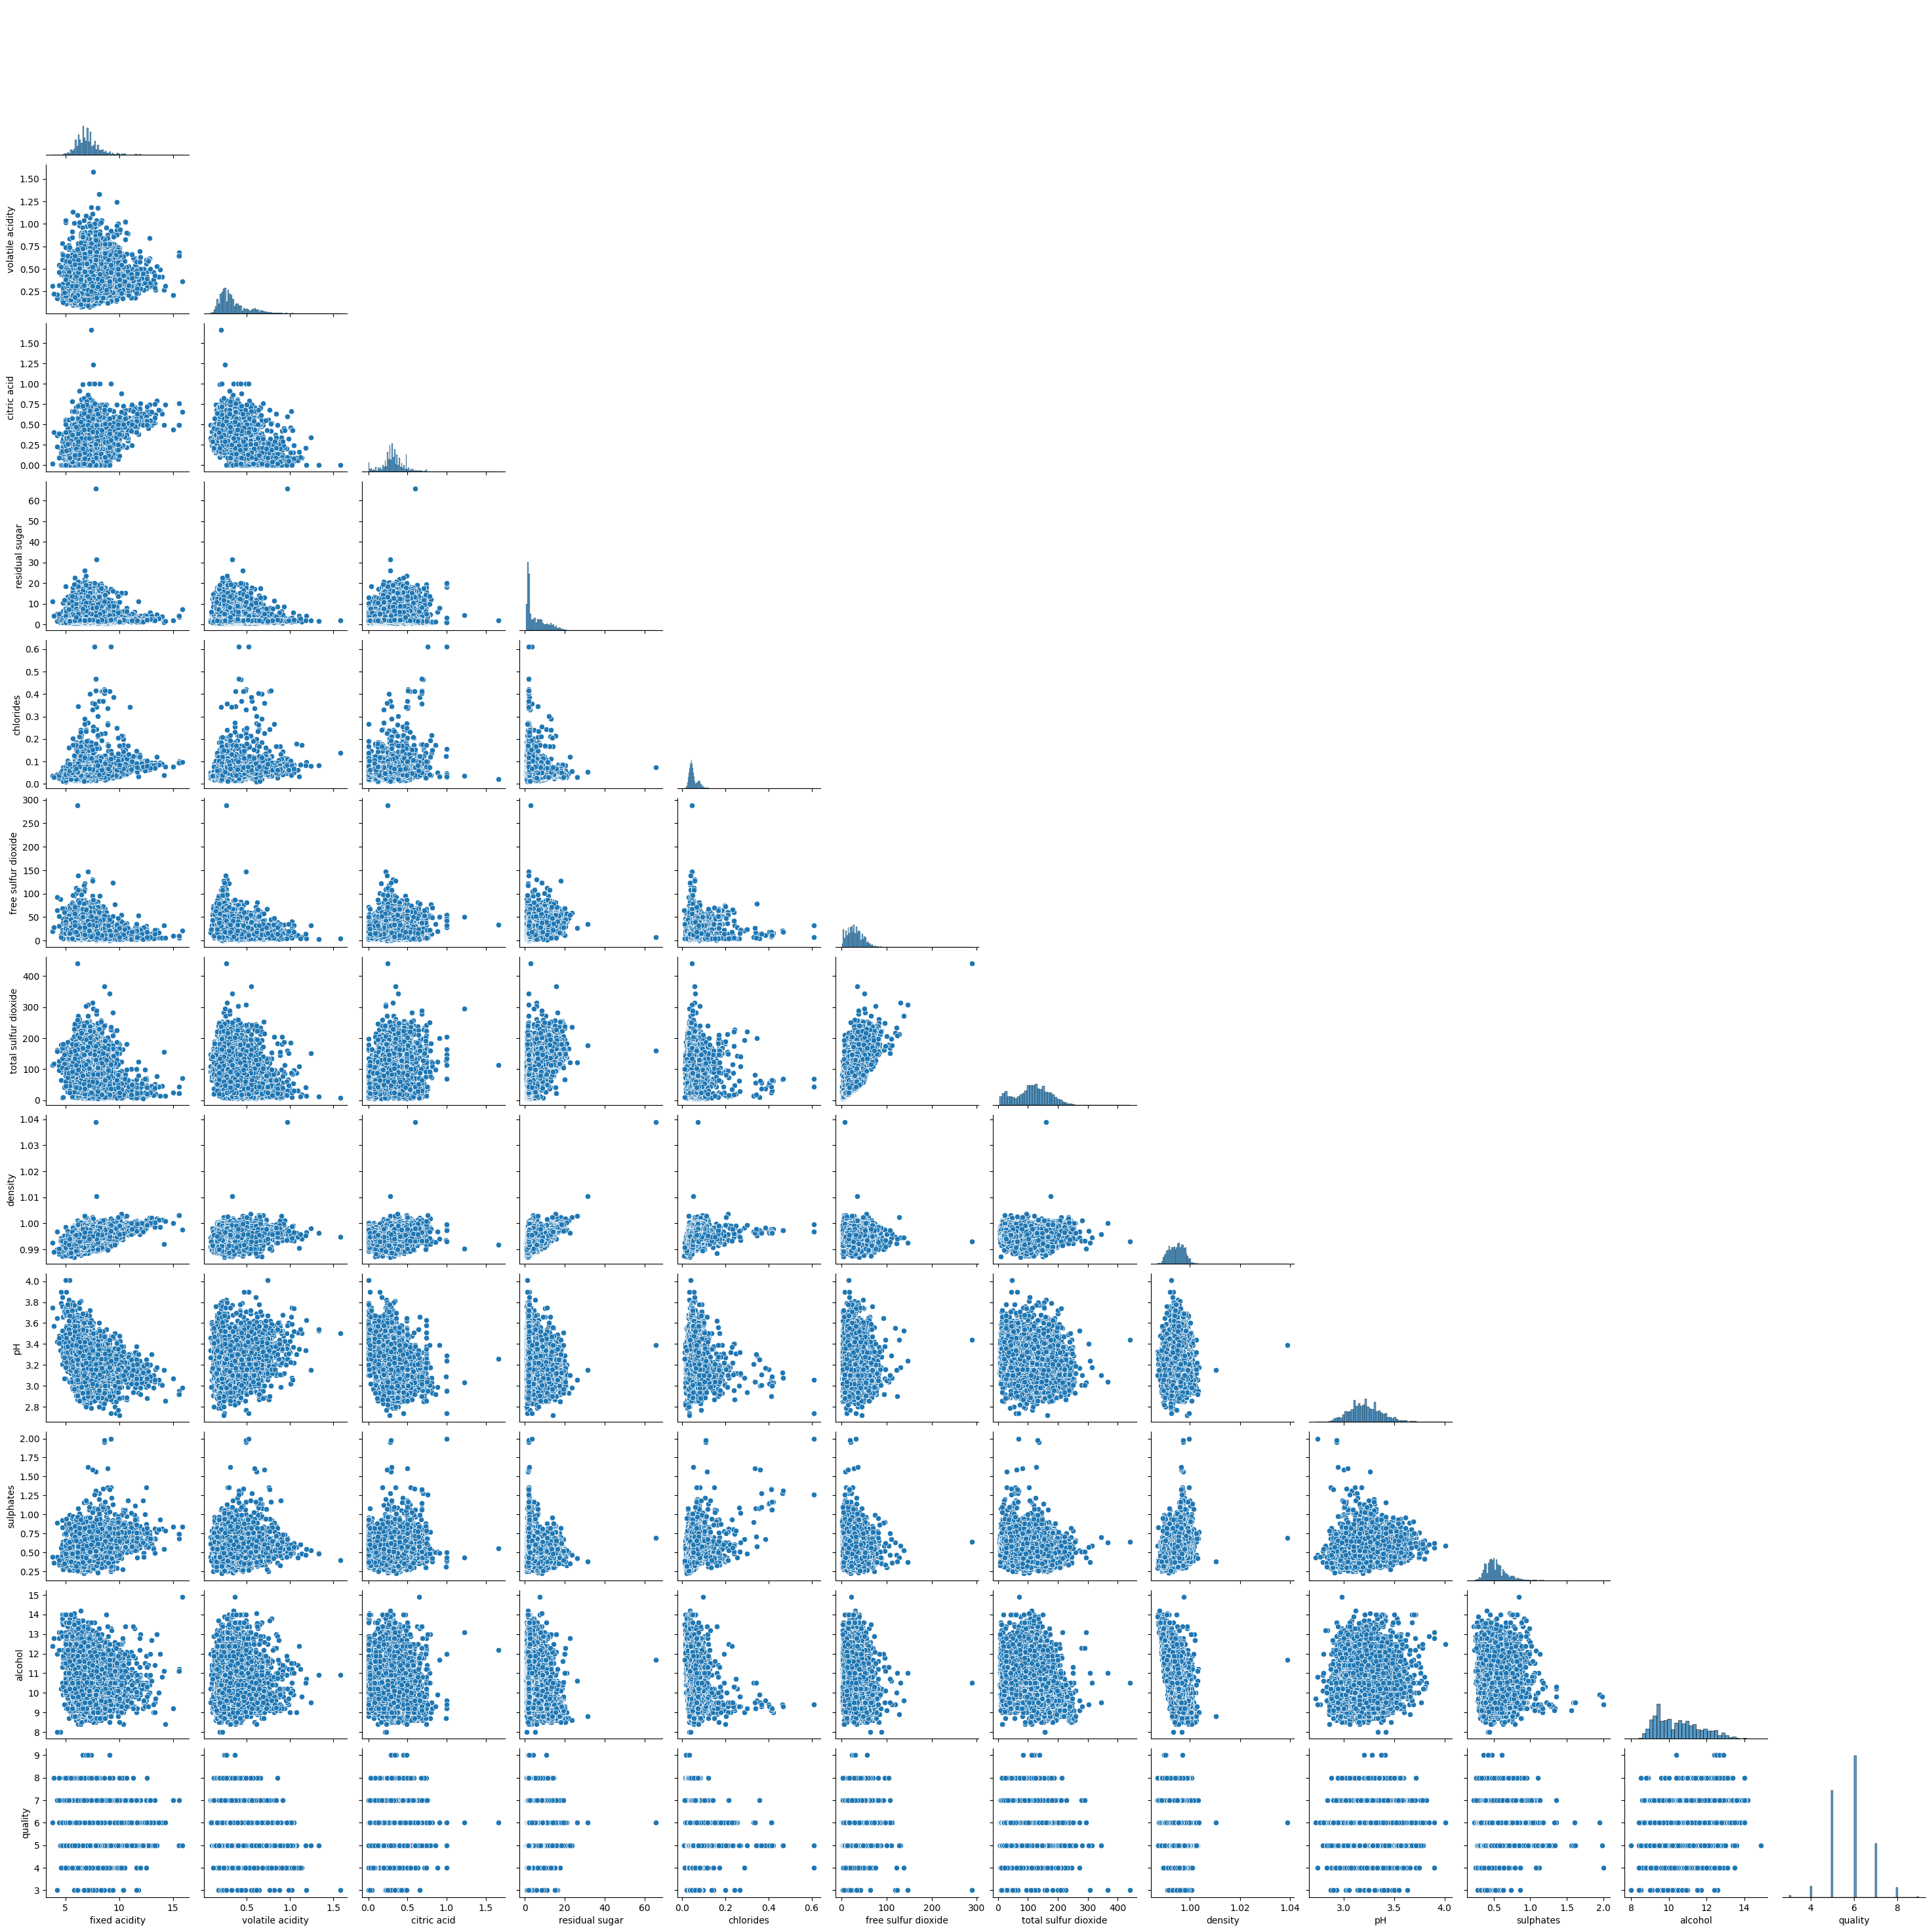

In [35]:
# remove missing valuess
import seaborn as sns
sns.pairplot(df,corner=True)

In [45]:
#binning and converting use case into classification

df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [46]:
from sklearn.model_selection import train_test_split


X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [47]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# TO NOTE for binary classification in NN
# one neuron activated with sigmoid function (between 0 and 1)

In [ ]:
# downsides with NN
# resource hogs in training
# 

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# 128 + 256 + 256 neurons in 3 hidden layers + 1 sigmoid activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Adam is gradient descent
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

In [49]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

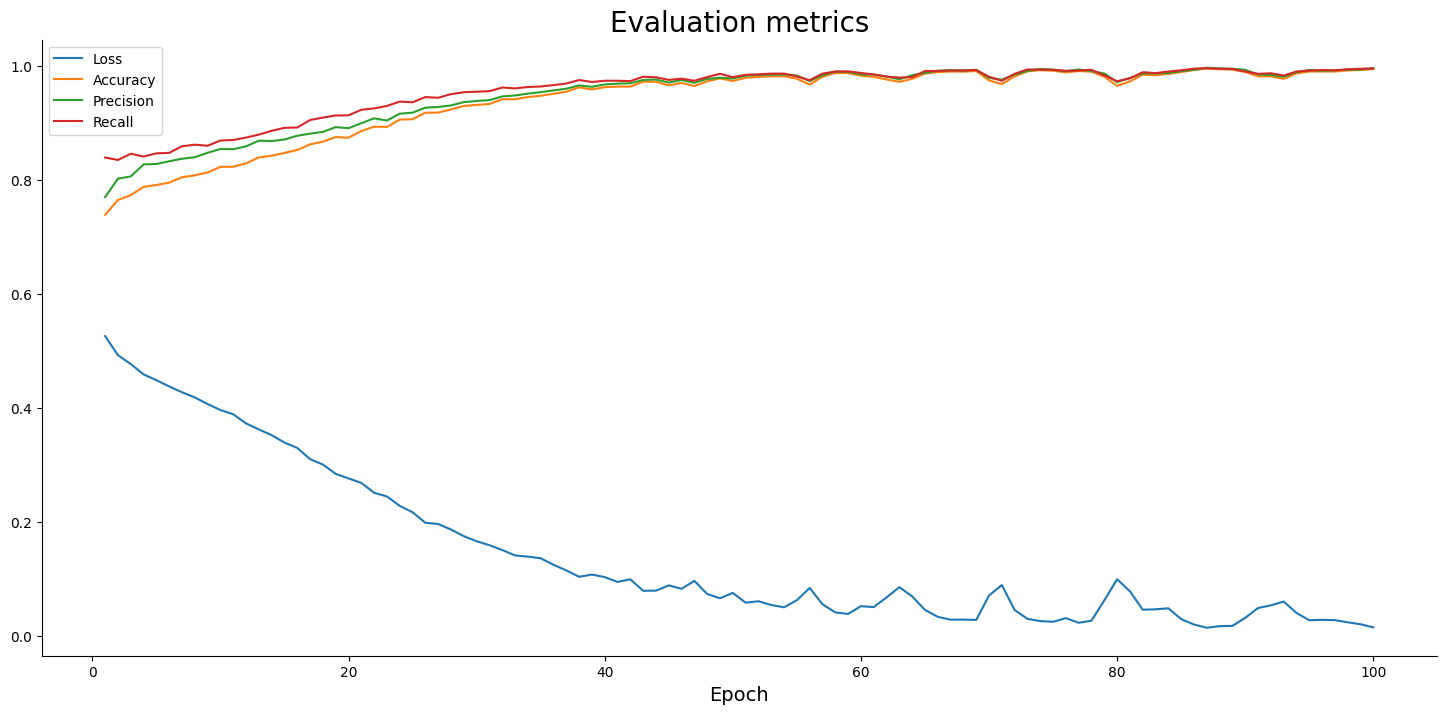

In [50]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
# after 40 spochs onwards the model is overfitting as the lines are decaying

In [51]:
predictions = model.predict(X_test_scaled)

41/41 [==============================] - 0s 2ms/step


In [54]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [55]:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[351 131]
 [144 667]]


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.79
Precision: 0.84
Recall: 0.82
